In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('rolling_stones_spotify.xlsx')

In [5]:
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [8]:
#checking for duplicates
duplicates = df.duplicated().sum()

In [9]:
duplicates

0

In [10]:
# check for missing values
df.isna().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [11]:
# checking for outliers
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [26]:
songs = df.groupby('album')['name'].count()

In [27]:
songs

album
12 X 5                              12
12 x 5                              12
A Bigger Bang (2009 Re-Mastered)    16
A Bigger Bang (Live)                22
Aftermath                           11
                                    ..
Undercover                          10
Undercover (2009 Re-Mastered)       10
Voodoo Lounge (Remastered 2009)     15
Voodoo Lounge Uncut (Live)          56
got LIVE if you want it!            12
Name: name, Length: 90, dtype: int64

In [35]:
song_counts = df['album'].value_counts()

In [36]:
song_counts

Voodoo Lounge Uncut (Live)                                   56
Honk (Deluxe)                                                47
Live Licks                                                   46
Tattoo You (Super Deluxe)                                    46
Some Girls (Deluxe Version)                                  44
                                                             ..
Beggars Banquet (50th Anniversary Edition)                   10
Let It Bleed (50th Anniversary Edition / Remastered 2019)     9
Black And Blue                                                8
Black And Blue (Remastered 2009)                              8
Jamming With Edward                                           6
Name: album, Length: 90, dtype: int64

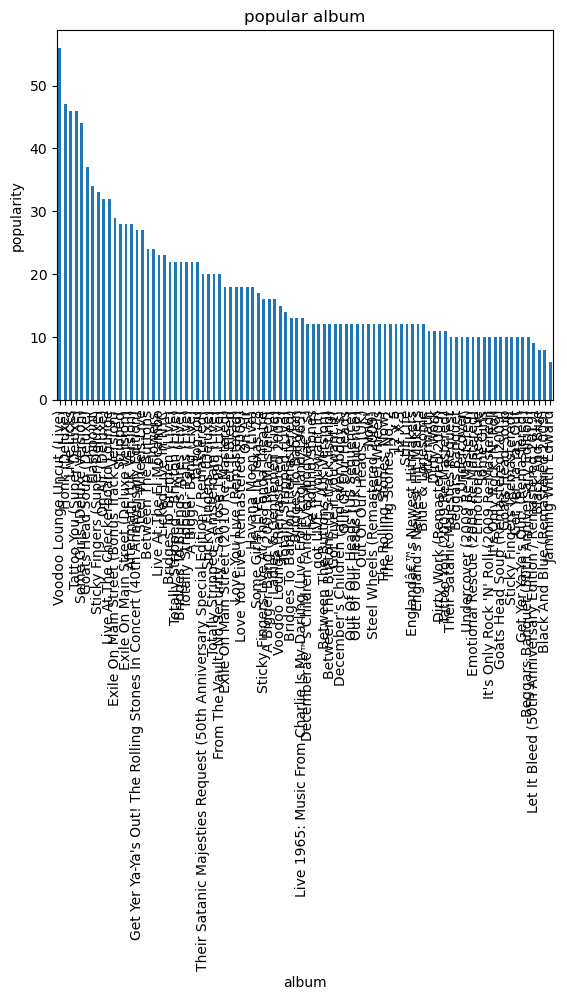

In [47]:
# Plot horizontal bar chart
song_counts.plot(kind='bar')
plt.xlabel('album')
plt.ylabel('popularity')
plt.title('popular album')
plt.show()

#####  from the above graph Voodoo Lounge Uncut (Live) and Honk (Deluxe)  are two popular albums

Text(0.5, 1.0, 'Popularity vs Danceability')

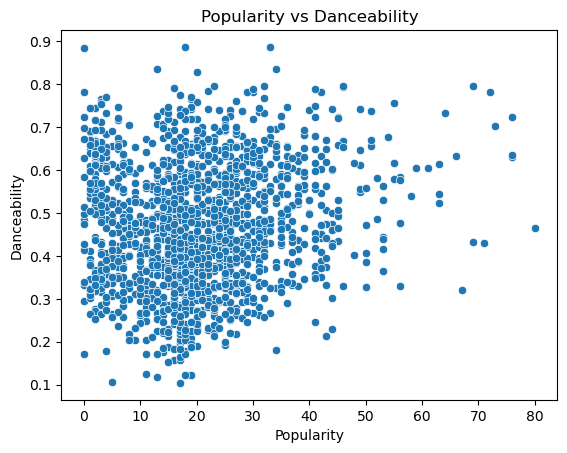

In [48]:
# Exploratory data analysis
sns.scatterplot(data=df, x='popularity', y='danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Popularity vs Danceability')

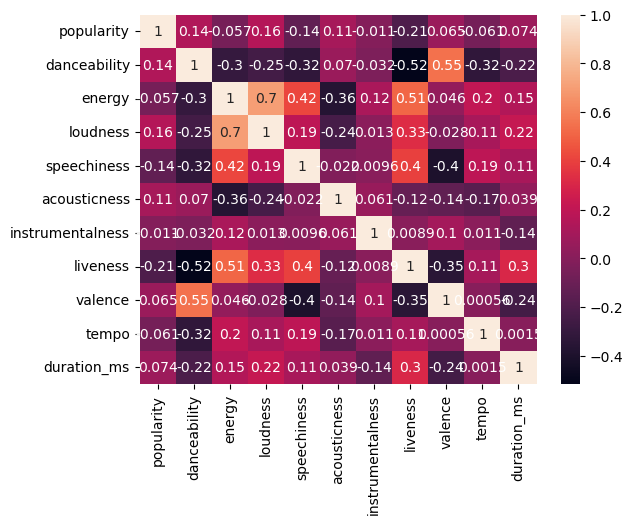

In [49]:
corr = df[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [50]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=2)
features_transformed = pca.fit_transform(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

Text(0, 0.5, 'PC2')

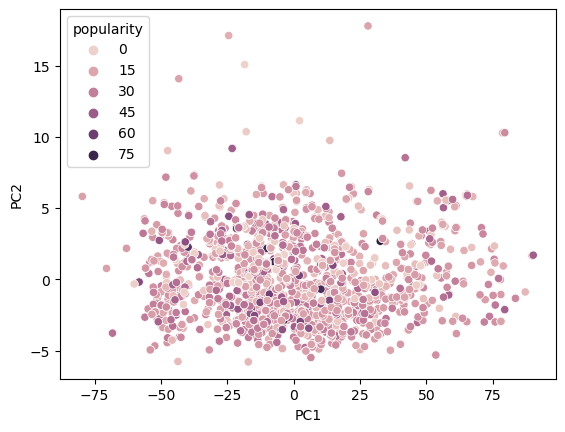

In [55]:
sns.scatterplot(x=features_transformed[:, 0], y=features_transformed[:, 1], hue=df['popularity'])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.loc[:,['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']])

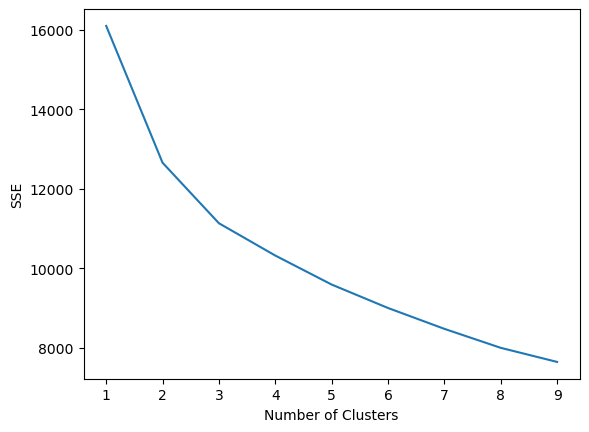

In [63]:
# Find the optimal number of clusters using the elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [64]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [65]:
clusters = pd.DataFrame(df, columns=df.columns)
clusters['cluster'] = kmeans.labels_

In [68]:
clusters.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cluster
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,1
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,1
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,1
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,1


In [69]:
#to print the features of cluster 
for i in range(kmeans.n_clusters):
    print(f'Cluster {i}:')
    print(clusters[clusters['cluster'] == i].describe())

Cluster 0:
       track_number  acousticness  danceability      energy  instrumentalness  \
count    508.000000    508.000000    508.000000  508.000000        508.000000   
mean       7.746063      0.157733      0.553057    0.809270          0.056819   
std        6.526874      0.145471      0.120879    0.122161          0.096405   
min        1.000000      0.000114      0.181000    0.421000          0.000000   
25%        3.000000      0.033050      0.468750    0.709750          0.000180   
50%        7.000000      0.115500      0.563000    0.838000          0.008440   
75%       10.000000      0.242000      0.633250    0.909000          0.069100   
max       46.000000      0.686000      0.887000    0.981000          0.498000   

         liveness    loudness  speechiness       tempo     valence  \
count  508.000000  508.000000   508.000000  508.000000  508.000000   
mean     0.294923   -6.708183     0.050291  123.944476    0.762242   
std      0.245778    2.618641     0.022621   24.8